In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Solving Viciously damped harmonic oscillator using RK4

ODE for viciously damped harmonic oscillator        
$$
    \frac{d^2x}{dt^2} + 2\lambda\omega_0\frac{dx}{dy} + \omega_0^2 x = 0
$$

In [ ]:
# intializing the paramters
omega0 = 5 #  Angurlar frequecy
lambda0 = 0.2 # vicious damping parameter

In [3]:
# derivative for damped oscillator
def damped_deriv(x, v, t):
    return -((2*lambda0*omega0)*v + (omega0**2)*x)

In [4]:
# Runge-Kutta method RK4
def RK4(dy, x, v, t, h):
    """
    Returns the next value of x and v after a step of size h
    using RK4 method.
    
    RK4 update method is defined for following 2nd order ODE
    coupled system of ODEs is as follows
    dv/dt = -(2*lambda0*lambda0)*v + (omega0**2)*x
    dx/dt = v

    Parameters
    ===========================================================
    dy: derivative function for velocity
    x: current value of x
    v: current value of v
    t: current time
    h: step size
    """
    k1v = dy(x, v, t)*h                   # k1 for velocity
    k1x = v * h                           # k1 for position
        
    k2v = dy(x+k1x/2, v+k1v/2, t+(h/2))*h # k2 for velocity
    k2x = (v+ k1v/2)*h                    # k2 for position
    
    k3v = dy(x+k2x/2, v+k2v/2, t+(h/2))*h # k3 for velocity
    k3x = ( v + k2v/2 ) *h                # k3 for position
    
    k4v = dy(x+k3x, v+k3v, t+h )*h        # k4 for velocity
    k4x = (v+ k3v )*h                     # k4 for position

    # updating the values
    v1 = v + (k1v + 2*k2v + 2*k3v + k4v)/6
    x1 = x + (k1x + 2*k2x + 2*k3x + k4x)/6
    return np.array([x1, v1])

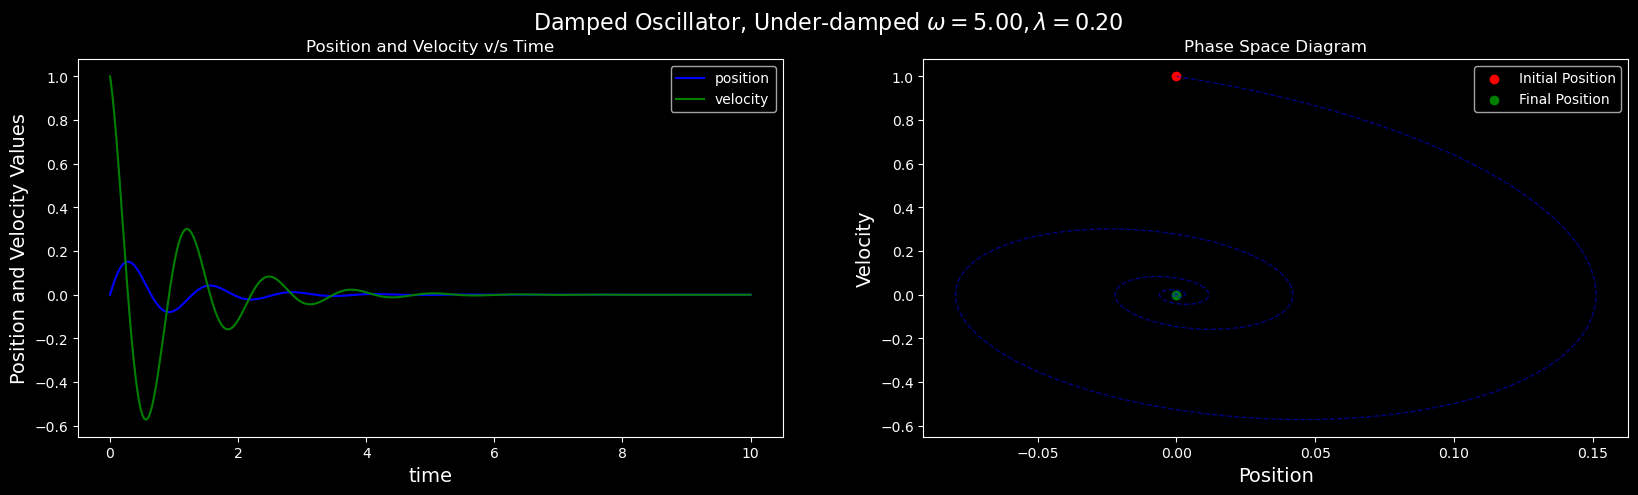

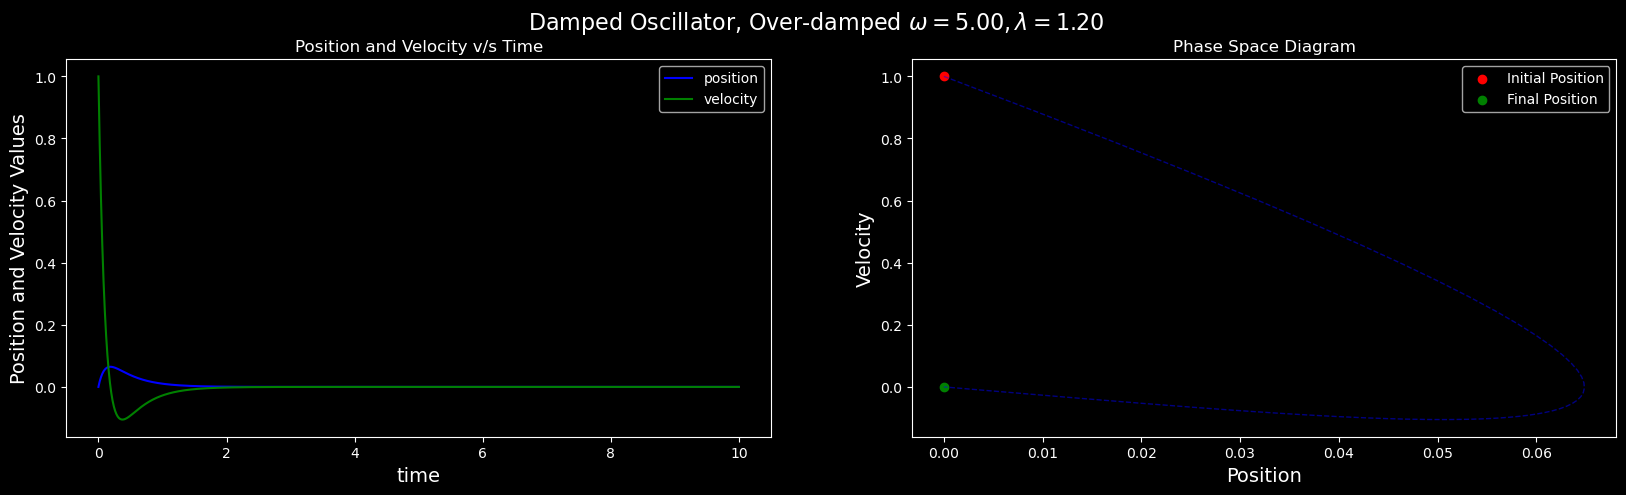

In [35]:
# Array of lambda values
# Change or add values here to change the range of lambda values
# It follows that: 
# lambda0<=1 : Underdamped
# lambda0>1  : Overdamped
L = np.array([0.2, 1.2]) 

# initializing the values
x0 = 0
v0 = 1


for l in L:
    lambda0 = l


    # array for storing the values
    x_arr = np.array([x0])
    v_arr = np.array([v0])

    # time array
    t_start = 0
    t_end   = 10
    N = 1000 #number of time stamps
    h = (t_end - t_start)/N
    t = np.linspace(t_start, t_end, N+1)

    # updating the values using RK4
    for i in range(N):
        [x_update, v_update] = RK4(damped_deriv, x_arr[-1], v_arr[-1], t[i], h)
        x_arr = np.append(x_arr, x_update)
        v_arr = np.append(v_arr, v_update)

    # plotting the values
    fig, ax = plt.subplots(1, 2, figsize=(20,5), dpi=100)
    # ploting postion and velocity in subplot 1
    ax[0].plot(t, x_arr, c='b', label='position')
    ax[0].plot(t, v_arr, c='g', label='velocity')
    ax[0].set_xlabel('time', fontsize=14)
    ax[0].set_ylabel('Position and Velocity Values', fontsize=14 )
    ax[0].set_title('Position and Velocity v/s Time')
    ax[0].legend()

    # plotting the phase space in subplot 2
    ax[1].plot(x_arr, v_arr, lw=1, ls='--', c='b', alpha=0.5)
    # scatter plot of the initial and final values
    ax[1].scatter(x0, v0, label='Initial Position', color='r')
    ax[1].scatter(x_arr[-1], v_arr[-1], label='Final Position', color='g')
    ax[1].set_xlabel('Position', fontsize=14)
    ax[1].set_ylabel('Velocity', fontsize=14)
    ax[1].set_title('Phase Space Diagram')
    ax[1].legend()

    if l<=1:
        t_string='Under-damped'
    elif l>1:
        t_string='Over-damped'

    plt.suptitle('Damped Oscillator, '+t_string+ ' $\\omega=%2.2f, \\lambda=%2.2f$'%(omega0, lambda0)
                   , fontsize=16);
    plt.savefig('Damped_oscillator_'+ t_string+'.jpg', bbox_inches='tight', dpi=200)

# Solving anharmonic oscillator using leap-frog method

In [6]:
# definging velocity derivative for an-harmonic oscillator
def anh_deriv(x, v, l, t):
    return -x - l*x**3

# energy of an-harmonic oscillator
def anh_energy(x,v,l):
    return 0.5*(v**2) + 0.5*(x**2) + l*(x**4)/4

In [7]:
# leap frog method with velocity verlet
def leap_frog(dy, x, v, l, t, h):
    """
    Returns the next value of x and v after a step of size h
    using leap frog method.
    
    Leap frog update method is defined for following 2nd order ODE
    coupled system of ODEs is as follows
    dv/dt = -x - l*x**3
    dx/dt = v

    Parameters
    ===========================================================
    dy: derivative function for velocity
    x: current value of x
    v: current value of v
    l: parameter for anharmonic oscillator
    t: current time
    h: step size
    """
    # half step for velocity
    v1 = v + dy(x, v, l, t)*h/2

    # full step for position
    x1 = x + v1*h
    # full step for velocity
    v2 = v1 + dy(x1, v1, l, t+h)*h/2

    return np.array([x1, v2])

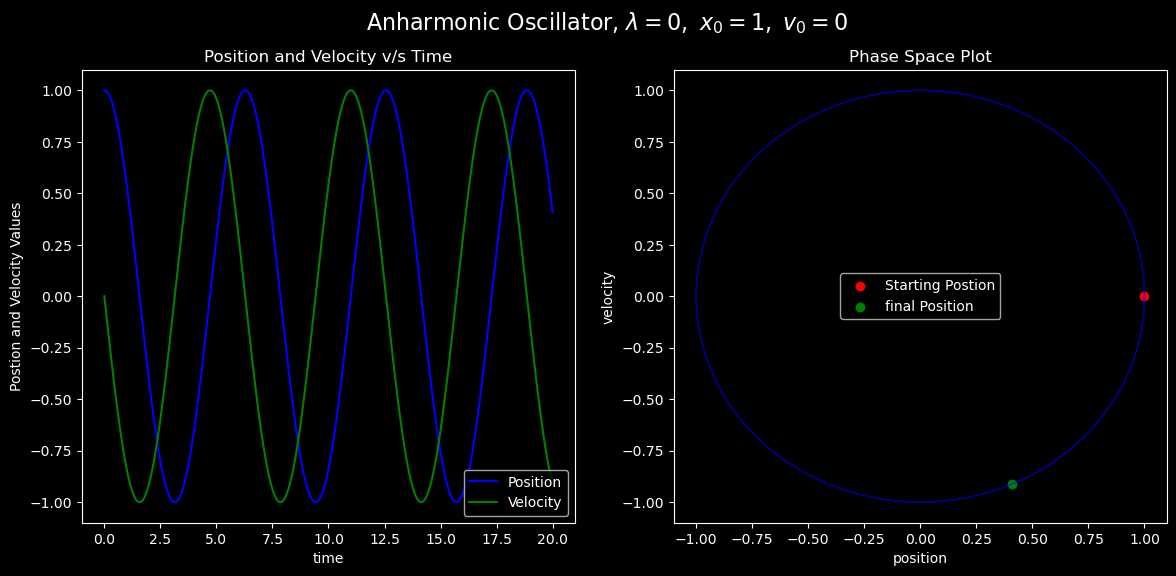

In [22]:
# initializing the values
x0 = 1
v0 = 0

# array of paramters for anharmonic oscillator
l_arr = np.array([0, 0.2, 0.5, 1, 5, 10])

# array for storing the values
x_arr = np.array([x0])
v_arr = np.array([v0])
E_arr = np.array([anh_energy(x0, v0, l_arr[0])])

# time array
t_start = 0
t_end   = 20
N = 1000 #number of time stamps
h = (t_end - t_start)/N
t = np.linspace(t_start, t_end, N+1)

# updating the values using leap frog
for i in range(N):
    [x_update, v_update] = leap_frog(anh_deriv, x_arr[-1], v_arr[-1], l_arr[0], t[i], h)
    x_arr = np.append(x_arr, x_update)
    v_arr = np.append(v_arr, v_update)
    E_arr = np.append(E_arr, anh_energy(x_update, v_update, l_arr[0]))

# plotting the energy of anharmonic oscillator
fig, ax = plt.subplots(1, 2, figsize=(14,6), dpi=100)
#plotting position and velocity in subplot 1
ax[0].plot(t, x_arr, c='b', label='Position')
ax[0].plot(t, v_arr, c='g', label='Velocity')
ax[0].set_xlabel('time')
ax[0].set_ylabel('Postion and Velocity Values')
ax[0].set_title('Position and Velocity v/s Time')
ax[0].legend()

#plotting phase-plot in subplot 2
ax[1].plot(x_arr, v_arr, lw=1, ls='--', c='b', alpha=0.5)
# scatter plot of the initial and final values
ax[1].scatter(x0, v0, label='Starting Postion', color='r')
ax[1].scatter(x_arr[-1], v_arr[-1], label='final Position', color='g')
ax[1].set_xlabel('position')
ax[1].set_ylabel('velocity')
ax[1].set_title('Phase Space Plot')
ax[1].legend()

plt.suptitle('Anharmonic Oscillator, $\\lambda=0, ~x_0=1, ~v_0=0$', fontsize=16);
plt.savefig('anh_osc_L0.jpg', bbox_inches='tight', dpi=200)

### Plotting for energy vs time for different step size and different lambdas

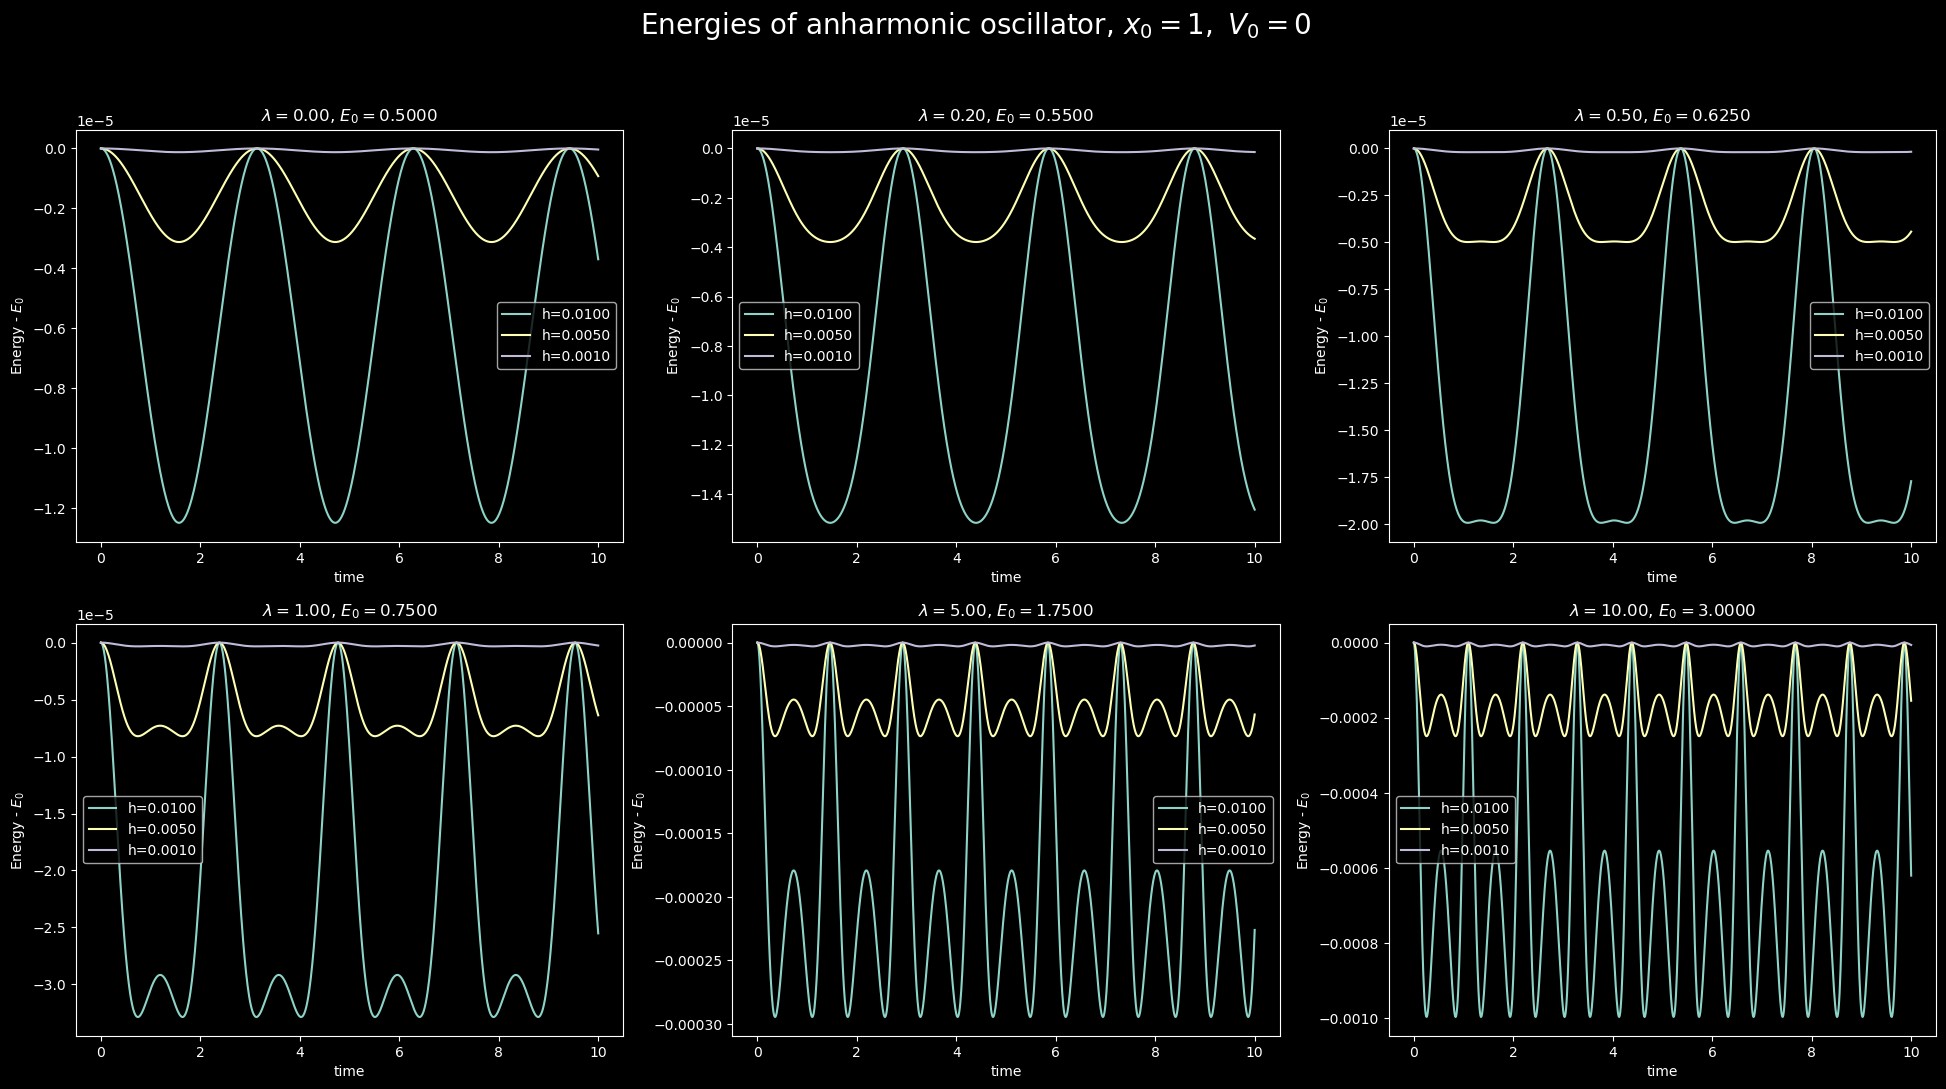

In [23]:
# array of paramters for anharmonic oscillator
l_arr = np.array([0, 0.2, 0.5, 1, 5, 10])

# array of stepsizes
h_arr = np.array([0.01, 0.005, 0.001])

fig, ax = plt.subplots(2, 3, figsize=(24,12), dpi=100)
m,n = 0,0 # counter for subplots
for L in l_arr:
    for h in h_arr:
        # array for storing the values
        x_arr = np.array([x0])
        v_arr = np.array([v0])
        E_arr = np.array([anh_energy(x0, v0, L)])

        # time array
        t_start = 0
        t_end   = 10
        N = int((t_end-t_start)/h) #number of time stamps
        t = np.linspace(t_start, t_end, N+1)

        # updating the values using leap frog
        for i in range(N):
            [x_update, v_update] = leap_frog(anh_deriv, x_arr[-1], v_arr[-1], L, t[i], h)
            x_arr = np.append(x_arr, x_update)
            v_arr = np.append(v_arr, v_update)
            E_arr = np.append(E_arr, anh_energy(x_update, v_update, L))

        # plotting the energy of anharmonic oscillator in subplots
        ax[m,n].plot(t, E_arr-E_arr[0], label='h=%2.4f'%h)
    ax[m,n].legend()
    ax[m,n].set_xlabel('time')
    ax[m,n].set_ylabel('Energy - $E_0$')
    ax[m,n].set_title('$\\lambda=%2.2f$, $E_0=%2.4f$'%(L, E_arr[0]))

    
    #updating subplot counters
    n += 1
    if n == 3:
        m += 1
        n = 0

plt.suptitle('Energies of anharmonic oscillator, $x_0=1,~V_0=0$', fontsize=20)
plt.savefig('anh_osc_energy.jpg', bbox_inches='tight', dpi=200)

### Phase-plot for different lambdas

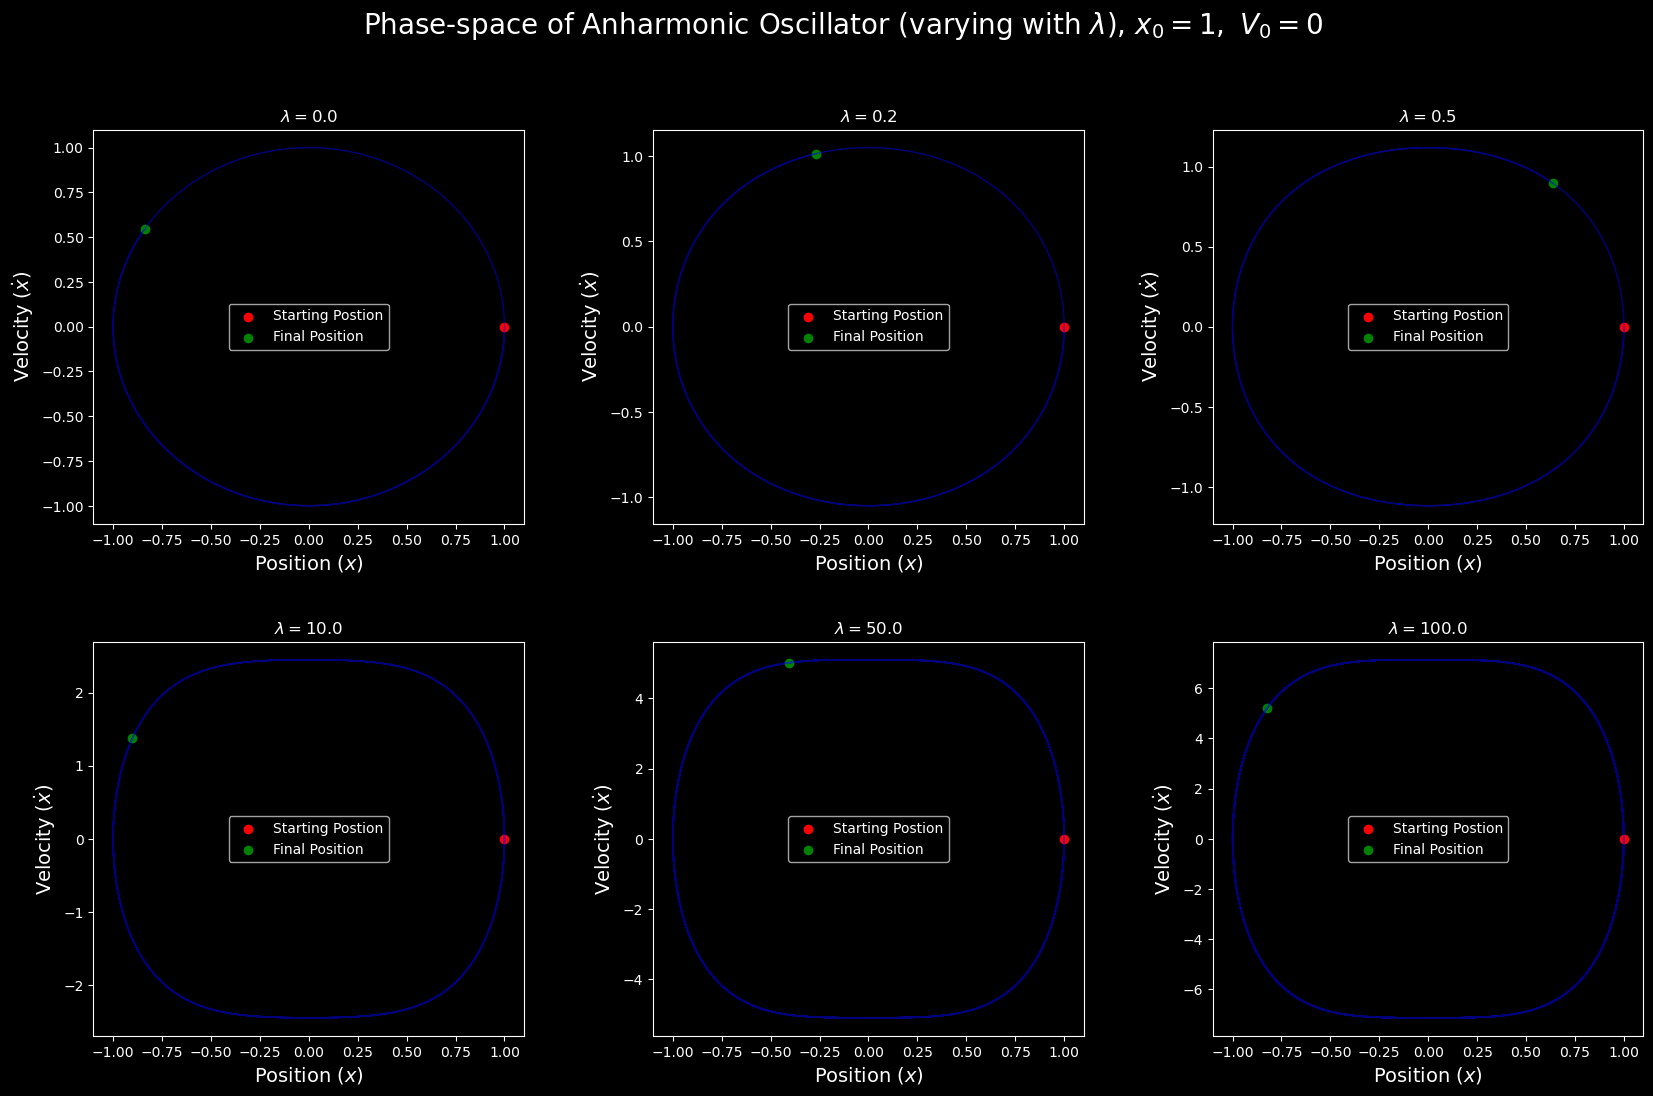

In [27]:
# array of paramters for anharmonic oscillator
l_arr = np.array([0, 0.2, 0.5, 10, 50, 100])

fig, ax = plt.subplots(2, 3, figsize=(20,12), dpi=100, gridspec_kw={'hspace':0.3, 'wspace':0.3})
m,n = 0,0 # counter for subplots
for L in l_arr:
    # array for storing the values
    x_arr = np.array([x0])
    v_arr = np.array([v0])

    #time array
    t_start = 0
    t_end   = 10
    N = 1000
    h = (t_end - t_start)/N
    t = np.linspace(t_start, t_end, N+1)

    # updating the values using leap frog
    for i in range(N):
        [x_update, v_update] = leap_frog(anh_deriv, x_arr[-1], v_arr[-1], L, t[i], h)
        x_arr = np.append(x_arr, x_update)
        v_arr = np.append(v_arr, v_update)
    
    #plotting phase-space in subplots
    ax[m,n].plot(x_arr, v_arr, lw=1, ls='-', c='b', alpha=0.5)
    #plotting the starting and ending points
    ax[m,n].scatter(x0, v0, label='Starting Postion', color='r')
    ax[m,n].scatter(x_arr[-1], v_arr[-1], label='Final Position', color='g')
    ax[m,n].legend()
    ax[m,n].set_xlabel('Position $(x)$', fontsize=14) 
    ax[m,n].set_ylabel('Velocity $(\\dot{x})$', fontsize=14)
    ax[m,n].set_title('$\\lambda=%2.1f$'%L)

    #updating subpolt counters
    n += 1
    if n == 3:
        m += 1
        n = 0
plt.suptitle('Phase-space of Anharmonic Oscillator (varying with $\\lambda$), $x_0=1,~V_0=0$', fontsize=20); 
plt.savefig('anh_osc_phase_space.jpg', bbox_inches='tight', dpi=200)

**Comment on the phase-space plot:** One can see that for higher values of $\lambda$, the plot tends to more rectangular plot, suggesting that the particle spends longer time at the extreme velocities and then quickly decays to $v=0$, which is expected for $x^3$ force term.